In [4]:
import math
import random
import matplotlib.pyplot as plt

In [5]:
cities = {
    1: (11003.611100, 42102.500000),
    2: (11108.611100, 42373.888900),
    3: (11133.333300, 42885.833300),
    4: (11155.833300, 42712.500000),
    5: (11183.333300, 42933.333300),
    6: (11297.500000, 42853.333300),
    7: (11310.277800, 42929.444400),
    8: (11416.666700, 42983.333300),
    9: (11423.888900, 43000.277800),
    10: (11438.333300, 42057.222200),
    11: (11461.111100, 43252.777800),
    12: (11485.555600, 43187.222200),
    13: (11503.055600, 42855.277800),
    14: (11511.388900, 42106.388900),
    15: (11522.222200, 42841.944400),
    16: (11569.444400, 43136.666700),
    17: (11583.333300, 43150.000000),
    18: (11595.000000, 43148.055600),
    19: (11600.000000, 43150.000000),
    20: (11690.555600, 42686.666700),
    21: (11715.833300, 41836.111100),
    22: (11751.111100, 42814.444400),
    23: (11770.277800, 42651.944400),
    24: (11785.277800, 42884.444400),
    25: (11822.777800, 42673.611100),
    26: (11846.944400, 42660.555600),
    27: (11963.055600, 43290.555600),
    28: (11973.055600, 43026.111100),
    29: (12058.333300, 42195.555600),
    30: (12149.444400, 42477.500000),
    31: (12286.944400, 43355.555600),
    32: (12300.000000, 42433.333300),
    33: (12355.833300, 43156.388900),
    34: (12363.333300, 43189.166700),
    35: (12372.777800, 42711.388900),
    36: (12386.666700, 43334.722200),
    37: (12421.666700, 42895.555600),
    38: (12645.000000, 42973.333300)
}

In [6]:
def calculate_distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def total_distance(path):
    return sum(calculate_distance(path[i], path[i + 1]) for i in range(len(path) - 1)) + calculate_distance(path[-1], path[0])

def generate_initial_solution():
    path = list(cities.keys())
    random.shuffle(path)
    return path

def apply_annealing(current_path, temperature):
    new_path = current_path.copy()
    i, j = random.sample(range(len(new_path)), 2)
    new_path[i], new_path[j] = new_path[j], new_path[i]

    current_energy = total_distance(current_path)
    new_energy = total_distance(new_path)

    if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temperature):
        return new_path
    else:
        return current_path

def perform_simulated_annealing():
    current_solution = generate_initial_solution()
    temperature = 10000.0
    cooling_rate = 0.9999

    while temperature > 1:
        current_solution = apply_annealing(current_solution, temperature)
        temperature *= cooling_rate

    return current_solution

def plot_optimal_route(path):
    x = [cities[city][0] for city in path]
    y = [cities[city][1] for city in path]

    plt.figure(figsize=(8, 8))
    plt.plot(x + [x[0]], y + [y[0]], marker='o', linestyle='-', color='b')
    plt.scatter(x, y, color='r')

    for city, (xi, yi) in cities.items():
        plt.text(xi, yi, str(city))

    plt.title('Optimal TSP Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


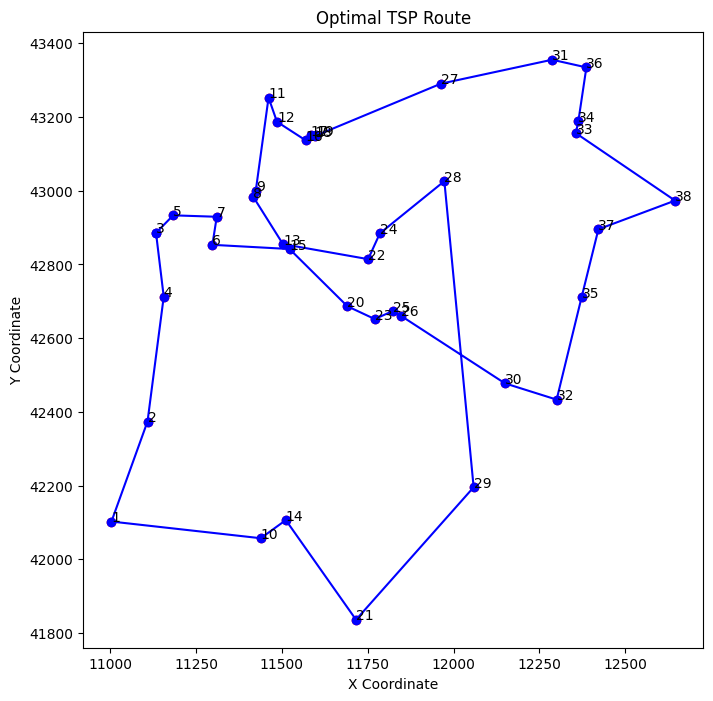

Optimal Path: [3, 5, 7, 6, 15, 20, 23, 25, 26, 30, 32, 35, 37, 38, 33, 34, 36, 31, 27, 19, 18, 17, 16, 12, 11, 9, 8, 13, 22, 24, 28, 29, 21, 14, 10, 1, 2, 4]
Path Length: 7668.227794732871


In [7]:
optimal_path = perform_simulated_annealing()
plot_optimal_route(optimal_path)
print("Optimal Path:", optimal_path)
print("Path Length:", total_distance(optimal_path))